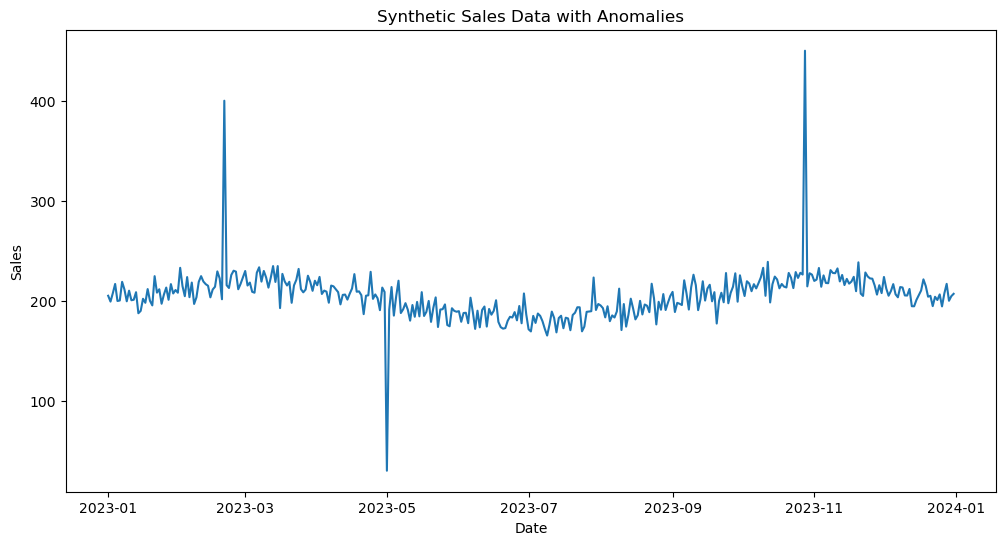

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create synthetic daily sales data for 1 year
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=365)
sales = 200 + 20 * np.sin(np.linspace(0, 3*np.pi, 365)) + np.random.normal(0, 10, 365)

# Inject anomalies: sudden spikes/drops
sales[50] = 400  # spike
sales[120] = 30  # drop
sales[300] = 450  # spike

# Create DataFrame
data = pd.DataFrame({'date': dates, 'sales': sales})

# Plot sales data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['sales'])
plt.title('Synthetic Sales Data with Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [7]:
# Reshape sales for model input
X = data['sales'].values.reshape(-1, 1)

# Train Isolation Forest
model = IsolationForest(contamination=0.03, random_state=42)
model.fit(X)

# Predict anomalies: -1 = anomaly, 1 = normal
data['anomaly'] = model.predict(X)


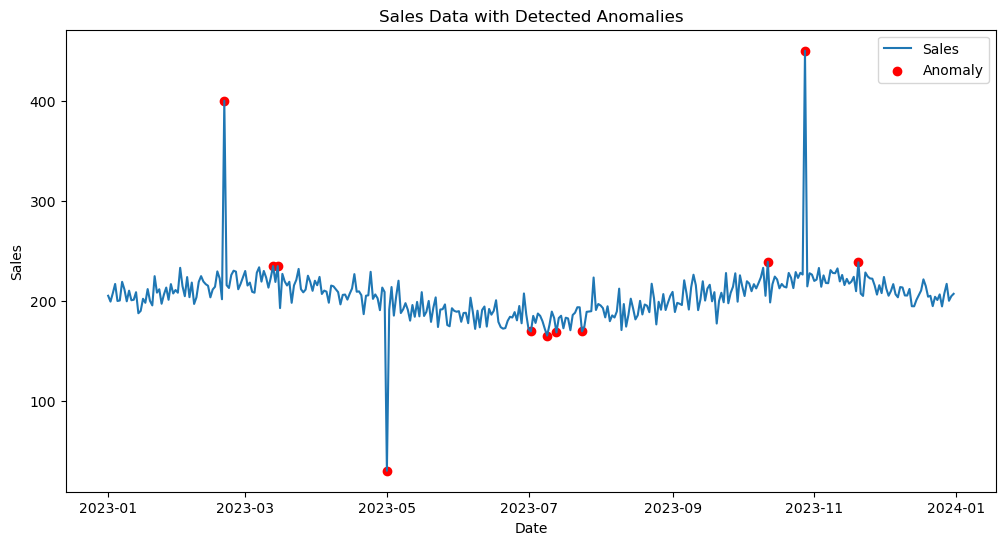

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['sales'], label='Sales')
plt.scatter(data[data['anomaly'] == -1]['date'], data[data['anomaly'] == -1]['sales'], color='red', label='Anomaly')
plt.title('Sales Data with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
